In [4]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import make_blobs, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
##–ò–∑–≤–ª–µ—á–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ —Ñ–∞–π–ª–∞

dtrain = pd.read_csv('/home/volkov/hard_mnist/hard_train.txt', header = None, sep = '\\s+')
dlabels = pd.read_csv('/home/volkov/hard_mnist/hard_train_labels.txt', header = None, sep = '\\s+')

In [12]:
X_train = np.array(dtrain[:10000])
y_train = np.array(dlabels[:10000])

X_test = np.array(dtrain[10000:11000])
y_test = np.array(dlabels[10000:11000])

–ó–∞–ø—É—Å—Ç–∏–º PCA –Ω–∞ 2-—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞—Ö. –ò –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –¥–ª—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –∫–ª–∞—Å—Å–æ–≤ –æ–±—ä–µ–∫—Ç—ã –∫—É—á–∫—É—é—Ç—Å—è –≤–º–µ—Å—Ç–µ. –ê –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–∏–ª—å–Ω–æ —Å–º–µ—à–∞–ª–∏—Å—å. –ß—Ç–æ –º–æ–∂–µ—Ç —É—Ö—É–¥—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

In [12]:
pca_result = PCA(n_components=2).fit_transform(X_train)

In [15]:
plt.figure(figsize=(14,8))
plt.title("Two components", fontsize=20)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train, linewidths=0)
plt.show()

–ú–µ—Ç–æ–¥ PCA_algorithm –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É, —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ —Å–ª–µ–¥—É–µ—Ç —Å–ø—Ä–æ–µ—Ü–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ, –∞ —Ç–∞–∫ –∂–µ –ø—É—Ç–∏ –∫—É–¥–∞ –∑–∞–ø–∏—Å–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–∂–∞—Ç–∏—è –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω–Ω—Å—Ç–≤–∞. –í —Å–ª—É—á–∞–µ –µ—Å–ª–∏ –æ–¥–∏–Ω –∏–∑ –ø—É—Ç–µ–π —É–∫–∞–∑–∞–Ω –Ω–µ –±—ã–ª, —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–Ω–µ—Ç –∫–æ—Ä—Ç–µ–∂ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏, –∏–Ω–∞—á–µ –∑–∞–ø–∏—à–µ—Ç –≤ —É–∫–∞–∑–∞–Ω–Ω—ã–µ —Ñ–∞–π–ª—ã –∏ –≤–µ—Ä–Ω–µ—Ç None.

In [5]:
def PCA_algorithm(X_train, X_test, n_components, file_path_train=None, file_path_test=None):
    pca = PCA(n_components=n_components).fit(X_train)
    pca_result_train = pca.transform(X_train)
    pca_result_test = pca.transform(X_test)
    if file_path_train and file_path_test:
        pd.DataFrame(pca_result_train).to_csv(file_path_train, sep=' ', index=False, header=False, mode='a')
        pd.DataFrame(pca_result_test).to_csv(file_path_test, sep=' ', index=False, header=False, mode='a')
    else: return(pca_result_train, pca_result_test)

–ó–¥–µ—Å—å –∑–∞–ø—É—Å–∫–∞–µ–º PCA –¥–ª—è 20 —Ä–∞–∑–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ PCA_output.

In [5]:
for n in range(1, 21):
    PCA_algorithm(X_train, X_test, n, 'PCA_output/PCA_train{}.txt'.format(n), 'PCA_output/PCA_test{}.txt'.format(n))

–§—É–Ω–∫—Ü–∏—è knn_algorithm –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É, –∞ —Ç–∞–∫ –∂–µ –æ—Ç–≤–µ—Ç—ã –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –∏ –æ–±—É—á–∞—é—â–µ–π 
–≤—ã–±–æ—Ä–∫–µ, –≤ kargs —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è –≤—Å–µ –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è KNeighborsClassifier. –î–∞–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –¥–æ–ª—é –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –∏ –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã –∞–ª–≥–æ—Ä–∏—Ç–º–∞.

In [10]:
def knn_algorithm(X_train, y_train, X_test, y_test, **kargs):
    start = time.time()
    model = KNeighborsClassifier(**kargs)
    model.fit(X_train, y_train)
    fraction_misclassifications = zero_one_loss(y_test, model.predict(X_test))
    end = time.time()
    return(fraction_misclassifications, end-start)

–ó–∞–ø—É—Å–∫–∞–µ–º KNN –Ω–∞ –≤—Å–µ—Ö —Ä–∞–Ω–µ–µ —Å–∂–∞—Ç—ã—Ö –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞—Ö. –†–µ–∑—É–ª—å—Ç–∞—Ç –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É—é—â–∏–µ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏.

In [7]:
for pca_number in range(1, 21):
    X_pca_train = pd.read_csv('PCA_output/PCA_train{}.txt'.format(pca_number), header = None, sep = '\\s+')
    X_pca_test = pd.read_csv('PCA_output/PCA_test{}.txt'.format(pca_number), header = None, sep = '\\s+')
    result = []
    for neighbors in range(1, 21):
        error_with_time = knn_algorithm(X_pca_train, y_train, X_pca_test, y_test, n_neighbors=neighbors, algorithm='brute')
        result.append(error_with_time)
    pd.DataFrame(result).to_csv('PCA_output/knn_PCA{}.txt'.format(pca_number), sep=' ', index=False, header=False, mode='a')

–ò–∑–æ–±—Ä–∞–∑–∏–º –º–∞—Ç—Ä–∏—Ü—ã –∫–∞—á–µ—Å—Ç–≤–∞ –∏ –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞–±–æ—Ç—ã –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç ùëë –∏ ùëò. –î–ª—è —ç—Ç–æ–≥–æ —Å–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç 2 –º–∞—Ç—Ä–∏—Ü—ã, –∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ–±—ä–µ–∫—Ç –∏—Ö –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É—é—â–∏–π.

In [8]:
def time_accuracy_matrix_plot(accuracy, time):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 8))
    ax1.imshow(accuracy, interpolation='none')
    ax1.set_title('Accuracy', fontsize=15)
    ax2.imshow(time, interpolation='none')
    ax2.set_title('Time', fontsize=15)
    return(plt)

In [5]:
time, accuracy = [], []
for pca_number in range(1, 21):
    f = pd.read_csv('PCA_output/knn_PCA{}.txt'.format(pca_number), header = None, sep = '\\s+')
    accuracy.append(1 - np.array(f[:][0]))
    time.append(np.array(f[:][1]))

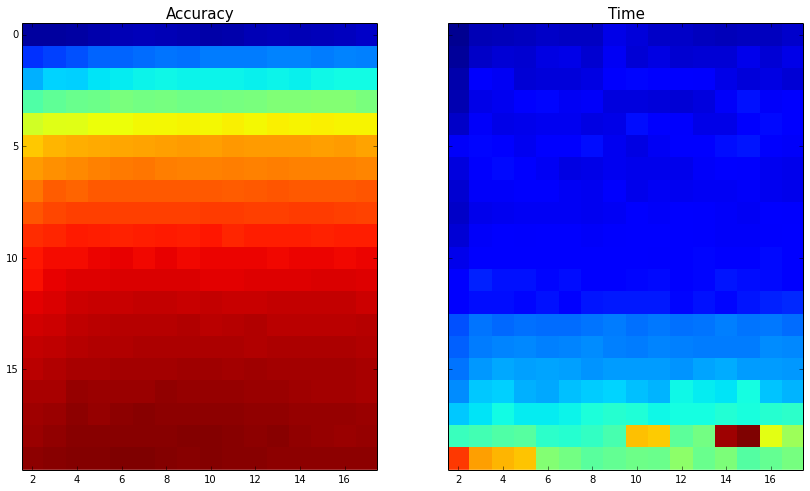

In [11]:
matrix_plot = time_accuracy_matrix_plot(accuracy, time)
matrix_plot.show()

–¢–∞–∫ –∫–∞–∫ –¥–∞–Ω–Ω—ã–µ –ø–æ–ª—É—á–∞–ª–∏—Å—å –∑–∞—à—É–º–ª–µ–Ω–Ω—ã–µ –ø—Ä–æ–≤–µ–¥–µ–º 5 —Ä–∞–∑–±–∏–µ–Ω–∏–π –∏—Å—Ö–æ–¥–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –∏ –¥–ª—è –≤—Å–µ—Ö –ø–æ–≤—Ç–æ—Ä–∏–º –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –¥–µ–π—Å—Ç–≤–∏—è.

In [7]:
step = 10000
test_size = 1000
for k in range(0, 5):
    X_train = np.array(dtrain[step*k:step*(k+1)])
    X_test = np.array(dtrain[step*(k+1):step*(k+1)+test_size])
    for n in range(1, 21):
        PCA_algorithm(X_train, X_test, n, 'PCA_output{}/PCA_train{}.txt'.format(k, n), 
                      'PCA_output{}/PCA_test{}.txt'.format(k, n))

In [23]:
step = 10000
test_size = 1000
for data_set_number in range(0, 5):
    y_train = np.array(dlabels[step*data_set_number:step*(data_set_number+1)])
    y_test = np.array(dlabels[step*(data_set_number+1):step*(data_set_number+1)+test_size])
    for pca_number in range(1, 21):
        X_pca_train = pd.read_csv('PCA_output{}/PCA_train{}.txt'.format(data_set_number, 
                                                                        pca_number), header = None, sep = '\\s+')
        X_pca_test = pd.read_csv('PCA_output{}/PCA_test{}.txt'.format(data_set_number,
                                                                      pca_number), header = None, sep = '\\s+')
        result = []
        for neighbors in range(1, 21):
            error_with_time = knn_algorithm(X_pca_train, y_train, X_pca_test, y_test, n_neighbors=neighbors, algorithm='brute')
            result.append(error_with_time)
        pd.DataFrame(result).to_csv('PCA_output{}/knn_PCA{}.txt'.format(data_set_number, pca_number), sep=' ',
                                    index=False, header=False, mode='a')

–£—Å—Ä–µ–¥–Ω–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ.

In [35]:
for knn_number in range(1, 21):
    average = np.array(pd.read_csv('PCA_output{}/knn_PCA{}.txt'.format(0, knn_number),
                                   header = None, sep = '\\s+'))
    for data_set_number in range(1, 5):
        average += np.array(pd.read_csv('PCA_output{}/knn_PCA{}.txt'.format(data_set_number, knn_number),
                                 header = None, sep = '\\s+'))
    pd.DataFrame(average/5).to_csv('PCA_output_average/knn_PCA_average{}.txt'.format(knn_number), sep=' ',
                                    index=False, header=False, mode='a')

–ò–∑–æ–±—Ä–∞–∑–∏–º –º–∞—Ç—Ä–∏—Ü—ã –∫–∞—á–µ—Å—Ç–≤–∞ –∏ –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞–±–æ—Ç—ã –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç ùëë –∏ ùëò. –ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å —á—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å—Ç–∞–ª–∏ –±–æ–ª–µ–µ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–º–∏.

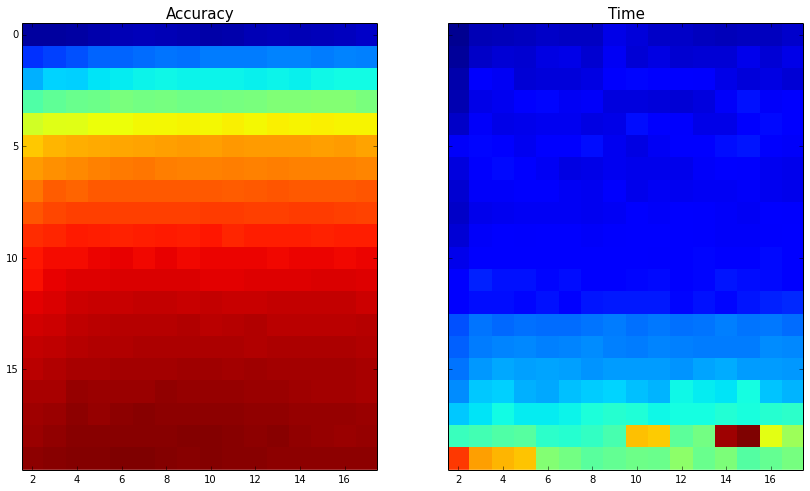

In [12]:
time, accuracy = [], []
for pca_number in range(1, 21):
    f = pd.read_csv('PCA_output_average/knn_PCA_average{}.txt'.format(pca_number), header = None, sep = '\\s+')
    accuracy.append(1 - np.array(f[:][0]))
    time.append(np.array(f[:][1]))

matrix_plot = time_accuracy_matrix_plot(accuracy, time)
matrix_plot.show()

–î–æ–ø–æ–ª—å–Ω–∏—Ç–µ–ª—å–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è. –ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –ø–æ—Å–ª–µ –ø—Ä–æ–≥–æ–Ω–∫–∏ KNN –Ω–∞ —Å–∂–∞—Ç—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –±—ã–ª–æ –±—ã –ª–æ–≥–∏—á—Ç–Ω–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–∞–∫, –∫–∞–∫ –º—ã —ç—Ç–æ –¥–µ–ª–∞–ª–∏ –≤ –ø—É–Ω—Ç–∫–µ 1. –ö–æ–≥–¥–∞ –æ–±—É—á–∞–ª–∏ KNN –Ω–∞ –Ω–µ—Å–∂–∞—Ç—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –ò –ø–æ –∏–¥–µ–µ –≤–∏–¥ –∫—Ä–∏–≤–æ–π –∏ –¥–æ–ª—è –æ—à–∏–±–æ–∫ –Ω–∞ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç –Ω–µ –¥–æ–ª–∂–Ω—ã —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—Ç—å—Å—è. –í —ç—Ç–æ–º –º—ã —Å–µ–π—á–∞—Å –∏ —É–±–µ–¥–∏–º—Å—è.

In [80]:
plt.figure(figsize=(14,8))
plt.ylabel("accuracy", fontsize=15)
plt.xlabel("k", fontsize=15)

k = range(1, 21)

for i in range(1, 21):
    f = pd.read_csv('PCA_output/knn_PCA{}.txt'.format(i), header = None, sep = '\\s+')
    accuracy = 1 - np.array(f[:][0])
    plt.plot(k, accuracy)
    
plt.show()

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –≤—ã—à–µ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ —Å–∞–º–∞—è —Ç–æ—á–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è(88.5%) –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è —É PCA c 20 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞–º–∏ –Ω–∞ 9 —Å–æ—Å–µ–¥—è—Ö.

In [82]:
plt.figure(figsize=(14,8))
plt.ylabel("accuracy", fontsize=15)
plt.xlabel("k", fontsize=15)

f = pd.read_csv('PCA_output/knn_PCA{}.txt'.format(20), header = None, sep = '\\s+')
accuracy = 1 - np.array(f[:][0])
plt.plot(k, accuracy)
plt.plot([9, 9], [0, 1], 'k-')
plt.plot([0, 20], [0.885, 0.885], 'k-')
plt.show()

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –º–æ–∂–Ω–æ –∏–∑–æ–±—Ä–∞–∑–∏—Ç—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –ø–æ–ª—É—á–∏–ª–∏ –ø–æ—Å–ª–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è.

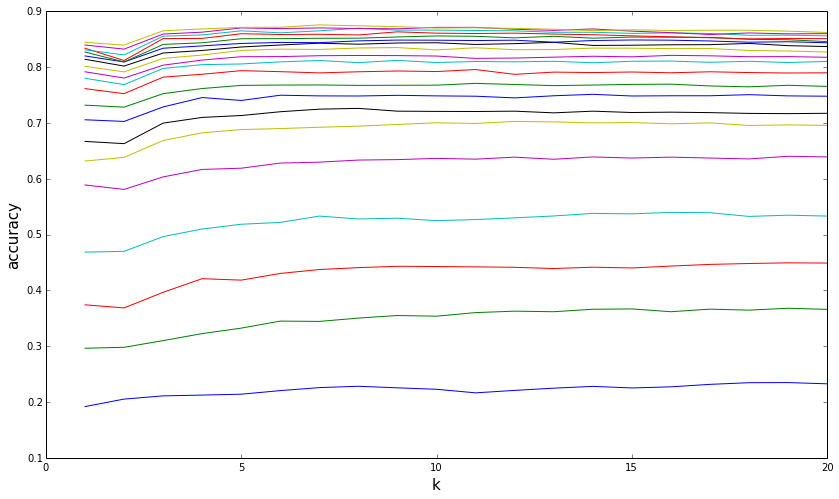

In [87]:
plt.figure(figsize=(14,8))
plt.ylabel("accuracy", fontsize=15)
plt.xlabel("k", fontsize=15)

k = range(1, 21)

for i in range(1, 21):
    f = pd.read_csv('PCA_output_average/knn_PCA_average{}.txt'.format(i), header = None, sep = '\\s+')
    accuracy = 1 - np.array(f[:][0])
    plt.plot(k, accuracy)
    
plt.show()

–ü–æ –¥–∞–Ω–Ω–æ–º—É –≥—Ä–∞—Ñ–∏–∫—É –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å –∞–Ω–∞–ª–æ–≥–∏—á–Ω—É—é —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è. –ß—Ç–æ –¥–æ–≤–æ–ª—å–Ω–æ –ª–æ–≥–∏—á–Ω–æ, —Ç–∞–∫ –∫–∞–∫ —Ç–µ–ø–µ—Ä—å –º—ã —É–∂–µ –Ω–µ —Ç–∞–∫ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã –∫ —à—É–º—É. –õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç(88%) –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è —É PCA —Å 20 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞–º–∏ –Ω–∞ 7 —Å–æ—Å–µ–¥—è—Ö.

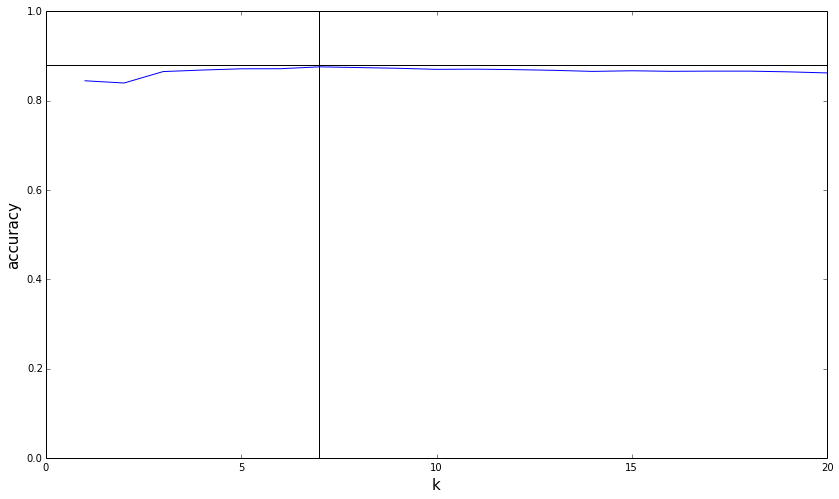

In [89]:
plt.figure(figsize=(14,8))
plt.ylabel("accuracy", fontsize=15)
plt.xlabel("k", fontsize=15)

f = pd.read_csv('PCA_output_average/knn_PCA_average{}.txt'.format(20), header = None, sep = '\\s+')
accuracy = 1 - np.array(f[:][0])
plt.plot(k, accuracy)

plt.plot([7, 7], [0, 1], 'k-')
plt.plot([0, 20], [0.88, 0.88], 'k-')
plt.show()